In [52]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout, Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D 
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras import optimizers
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image
import glob
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path="/content/drive/MyDrive/splatmusicprj/logmel_all/"
folder = ["batteryfull","chanponchant","chipdamage","dontslip","easyqueasy","endolphinesurge","entropical","finsandfiddles","inkoming","prettytactics","ripentry","seaformshanty","seasick","shipwreckin","suddentheory","undertow"]
image_size = 200
 
X = []
Y = []
for index, name in enumerate(folder):
    dir = path + name
    files = glob.glob(dir + "/*.png")
    for i, file in enumerate(files):
        image = Image.open(file)
        image = image.convert("RGB")
        image = image.resize((image_size, image_size))
        data = np.asarray(image)
        X.append(data)
        Y.append(index)
 
X = np.array(X)
Y = np.array(Y)

In [5]:
X = X.astype('float32')
X = X / 255.0

In [7]:
# 正解ラベルの形式を変換
Y = np_utils.to_categorical(Y, 16)

In [89]:
# 学習用データとテストデータ
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)

In [85]:
# CNNを構築
model = Sequential()
 
model.add(Conv2D(32, (3, 3), padding='same',input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(len(folder)))
model.add(Activation('softmax'))
 
# コンパイル
model.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])


In [90]:
#訓練
history = model.fit(X_train, y_train, batch_size=16, epochs=200, verbose=1, validation_data=(X_test, y_test))#, epochs=200)

Epoch 1/200
11/11 [==============================] - 1s 75ms/step - loss: 2.7273 - accuracy: 0.1207 - val_loss: 2.7447 - val_accuracy: 0.0686
Epoch 2/200
11/11 [==============================] - 1s 66ms/step - loss: 2.7174 - accuracy: 0.1207 - val_loss: 2.7408 - val_accuracy: 0.0686
Epoch 3/200
11/11 [==============================] - 1s 67ms/step - loss: 2.6975 - accuracy: 0.1264 - val_loss: 2.7377 - val_accuracy: 0.0686
Epoch 4/200
11/11 [==============================] - 1s 66ms/step - loss: 2.6969 - accuracy: 0.1379 - val_loss: 2.7356 - val_accuracy: 0.0857
Epoch 5/200
11/11 [==============================] - 1s 66ms/step - loss: 2.6865 - accuracy: 0.1322 - val_loss: 2.7324 - val_accuracy: 0.1143
Epoch 6/200
11/11 [==============================] - 1s 66ms/step - loss: 2.6775 - accuracy: 0.1207 - val_loss: 2.7312 - val_accuracy: 0.1200
Epoch 7/200
11/11 [==============================] - 1s 66ms/step - loss: 2.6702 - accuracy: 0.1667 - val_loss: 2.7250 - val_accuracy: 0.1486
Epoch 

In [91]:
#評価 & 評価結果出力
print(model.evaluate(X_test, y_test))

6/6 [==============================] - 0s 30ms/step - loss: 0.0677 - accuracy: 0.9829
[0.06765928864479065, 0.9828571677207947]


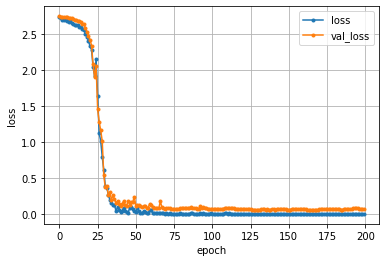

In [93]:
loss     = history.history['loss']
val_loss = history.history['val_loss']


nb_epoch = len(loss)
plt.plot(range(nb_epoch), loss,     marker='.', label='loss')
plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

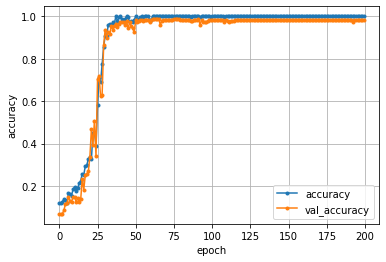

In [94]:
acc     = history.history['accuracy']
val_acc = history.history['val_accuracy']


nb_epoch = len(loss)
plt.plot(range(nb_epoch), acc,     marker='.', label='accuracy')
plt.plot(range(nb_epoch), val_acc, marker='.', label='val_accuracy')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [95]:
def print_cmx(y_true, y_pred):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    plt.figure(figsize = (10,7))
    sns.heatmap(df_cmx, annot=True)
    plt.show()

(175, 200, 200, 3)
<class 'numpy.ndarray'>
(175, 16)
13


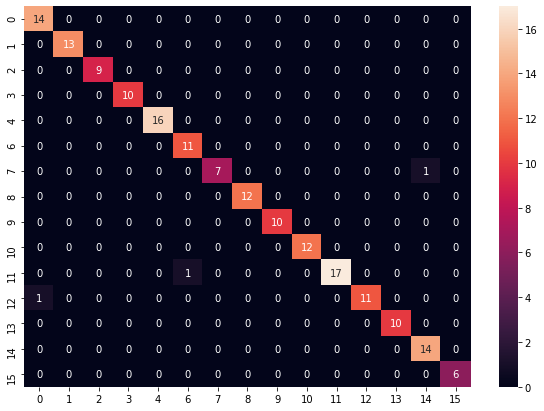

In [96]:
print(X_test.shape)

predictions = model.predict(X_test)

print(type(predictions))

print(predictions.shape)

num=10
# print(predictions[num])
print(predictions[num].argmax())
# print(y_test[num])
# print(y_test[num].argmax())

ytcross=[]
ypcross=[]
# for i in range(len(Y)):
#   ytcross.append(Y[i].argmax())
#   ypcross.append(predictions[i].argmax())
# print_cmx(ytcross,ypcross)
for i in range(len(y_test)):
  ytcross.append(y_test[i].argmax())
  ypcross.append(predictions[i].argmax())
print_cmx(ytcross,ypcross)